<a href="https://colab.research.google.com/github/vinodgaitonde/Assignments/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

In this assignment, you will implement the K-Means clustering algorithm step by step. The goal is to gain a deeper understanding of how K-Means works by coding each part of the algorithm from scratch. You will:

1. Find the closest centroids for each data point.
2. Compute the new centroid means based on assignments.
3. Determine the optimal number of clusters (K) using the Elbow Method.
4. Integrate all steps into a single function `run_kmeans()` and visualize the results.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a name="1"></a>
## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together.

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”.
      
* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step:
        # Assign each data point to the closest centroid.
        # idx[i] corresponds to the index of the centroid
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step:
        # Compute means based on centroid assignments
        centroids = compute_means(X, idx, K)
    ```
* The inner-loop of the algorithm repeatedly carries out two steps:
    * (i) Assigning each training example $x^{(i)}$ to its closest centroid, and
    * (ii) Recomputing the mean of each centroid using the points assigned to it.

* The $K$-means algorithm will always converge to some final set of means for the centroids.

* However, that the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations.
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

* You will implement the two phases of the K-means algorithm separately
in the next sections.
    * You will start by completing `find_closest_centroid` and then proceed to complete `compute_centroids`.

* **Determining the Optimal Number of Clusters (K) using the Elbow Method**:
    * After completing the basic K-means algorithm implementation, you will utilize the Elbow Method to determine the optimal number of clusters.
    * This involves plotting the cost (sum of squared distances) versus the number of clusters and looking for a 'knee' in the graph. The knee or elbow point is typically considered as the optimal number of clusters where increasing the number of clusters does not significantly decrease the cost function, suggesting diminishing returns.



<a name="1.1"></a>
### 1.1 Finding closest centroids

The algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids.

<a name="ex01"></a>
### Exercise 1

Your task is to complete the code in `find_closest_centroids`.
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids`
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{1,...,K\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)

In [ ]:
# GRADED FUNCTION 1: find_closest_centroids

def find_closest_centroids(X, centroids):
    #Assign each data point to the closest centroid

    #Input:
    #X: ndarray of shape (m, n) - m data points with n features
    #centroids: ndarray of shape (K, n) - K centroids with n features

    #Output:
    #idx: ndarray of shape (m,) - index of the closest centroid for each data point

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = []
        for j in range(K):
            norm_ij = np.sum((X[i] - centroids[j]) ** 2) # Your code to calculate the norm between (X[i] - centroids[j]) ; Squared Euclidean distance
            distance.append(norm_ij)

        idx[i] = np.argmin(distance) # Your code here to calculate index of minimum value in distance
    ### END CODE HERE ###

    return idx

Now let's check your implementation using an example dataset

**TEST FUNCTION**

In [ ]:
# Simply Run this cell.Do not Touch this code
# Test function
def find_closest_centroids_test(target):
    print("Running tests for find_closest_centroids:")

    # Test case 1: Simple 2D example
    X = np.array([[1, 1], [2, 1], [4, 3], [5, 4]])
    centroids = np.array([[1, 2], [5, 3]])
    idx = target(X, centroids)
    expected_idx = np.array([0, 0, 1, 1])

    print("\nTest case 1:")
    print("Input X:", X)
    print("Input centroids:", centroids)
    print("Expected output:", expected_idx)
    print("Actual output:", idx)

    assert np.all(idx == expected_idx), f"Test case 1 failed. Expected: {expected_idx}, got: {idx}"

    # Test case 2: 3D example
    X = np.array([[1, 1, 1], [2, 2, 2], [4, 4, 4], [5, 5, 5]])
    centroids = np.array([[1, 1, 1], [4, 4, 4]])
    idx = target(X, centroids)
    expected_idx = np.array([0, 0, 1, 1])

    print("\nTest case 2:")
    print("Input X:", X)
    print("Input centroids:", centroids)
    print("Expected output:", expected_idx)
    print("Actual output:", idx)

    assert np.all(idx == expected_idx), f"Test case 2 failed. Expected: {expected_idx}, got: {idx}"

    # Test case 3: More centroids than points
    X = np.array([[1, 1], [4, 4]])
    centroids = np.array([[1, 1], [2, 2], [3, 3], [4, 4]])
    idx = target(X, centroids)
    expected_idx = np.array([0, 3])

    print("\nTest case 3:")
    print("Input X:", X)
    print("Input centroids:", centroids)
    print("Expected output:", expected_idx)
    print("Actual output:", idx)

    assert np.all(idx == expected_idx), f"Test case 3 failed. Expected: {expected_idx}, got: {idx}"

    print("\n\033[92mAll tests passed!")

find_closest_centroids_test(find_closest_centroids)

Running tests for find_closest_centroids:

Test case 1:
Input X: [[1 1]
 [2 1]
 [4 3]
 [5 4]]
Input centroids: [[1 2]
 [5 3]]
Expected output: [0 0 1 1]
Actual output: [0 0 1 1]

Test case 2:
Input X: [[1 1 1]
 [2 2 2]
 [4 4 4]
 [5 5 5]]
Input centroids: [[1 1 1]
 [4 4 4]]
Expected output: [0 0 1 1]
Actual output: [0 0 1 1]

Test case 3:
Input X: [[1 1]
 [4 4]]
Input centroids: [[1 1]
 [2 2]
 [3 3]
 [4 4]]
Expected output: [0 3]
Actual output: [0 3]

All tests passed!


**EXPECTED OUTPUT**

```
Test case 1:
Input X: [[1 1]
 [2 1]
 [4 3]
 [5 4]]
Input centroids: [[1 2]
 [5 3]]
Expected output: [0 0 1 1]

Test case 2:
Input X: [[1 1 1]
 [2 2 2]
 [4 4 4]
 [5 5 5]]
Input centroids: [[1 1 1]
 [4 4 4]]
Expected output: [0 0 1 1]

Test case 3:
Input X: [[1 1]
 [4 4]]
Input centroids: [[1 1]
 [2 2]
 [3 3]
 [4 4]]
Expected output: [0 3]
```



### 1.2 Recalculating Centroid Averages

Once every point has been assigned to a centroid, the next step of the algorithm involves recalculating the averages for each centroid based on the points allocated to it.

<a name="ex02"></a>
### Exercise 2

Please implement the function `compute_centroids` detailed below to update the position of each centroid.

* Specifically, for each centroid $\mu_k$, it is recalculated as follows:
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$

    where:
    * $C_k$ represents the collection of data points assigned to centroid $k$.
    * $|C_k|$ denotes the count of data points in $C_k$.

* For example, if data points $x^{(3)}$ and $x^{(5)}$ are both assigned to centroid $k=2$, then centroid $\mu_2$ should be updated to $\mu_2 = \frac{1}{2}(x^{(3)} + x^{(5)})$.

This function recalculates each centroid based on the mean of the points assigned to it, ensuring that the centroids move towards the optimal position to minimize the distance to the points in their cluster.


In [ ]:
# GRADED FUNCTION 2: compute_centpods

def compute_centroids(X, idx, K):
    #Compute new centroids based on the current assignments

    #Input:
    #X: ndarray of shape (m, n) - m data points with n features
    #idx: ndarray of shape (m,) - current assignments
    #K: int - number of clusters

    #Output:
    #centroids: ndarray of shape (K, n) - updated centroids

    m, n = X.shape
    centroids = np.zeros((K, n))

### START CODE HERE ###
    for k in range(K):
        points_in_cluster =  X[idx == k] # Your code here to get a list of all data points in X assigned to centroid k
        if len(points_in_cluster) > 0: # a check to avoid division by zero when a cluster is empty
            centroids[k] =  np.mean(points_in_cluster, axis=0)# Your code here to compute the mean of the points assigned
  ### END CODE HERE ##
    return centroids

**TEST FUNCTION**

In [ ]:
# Simply Run this cell.Do not Touch this code
# Test function
def compute_centroids_test(target):
    print("Running tests for compute_centroids:")

    # Test case 1: Simple 2D example
    X = np.array([[1, 1], [2, 1], [4, 3], [5, 4]])
    idx = np.array([0, 0, 1, 1])
    K = 2
    centroids = target(X, idx, K)
    expected_centroids = np.array([[1.5, 1], [4.5, 3.5]])

    print("\nTest case 1:")
    print("Input X:", X)
    print("Input idx:", idx)
    print("Input K:", K)
    print("Expected output:", expected_centroids)
    print("Actual output:", centroids)

    assert np.allclose(centroids, expected_centroids), f"Test case 1 failed. Expected: {expected_centroids}, got: {centroids}"

    # Test case 2: 3D example
    X = np.array([[1, 1, 1], [2, 2, 2], [4, 4, 4], [5, 5, 5]])
    idx = np.array([0, 0, 1, 1])
    K = 2
    centroids = target(X, idx, K)
    expected_centroids = np.array([[1.5, 1.5, 1.5], [4.5, 4.5, 4.5]])

    print("\nTest case 2:")
    print("Input X:", X)
    print("Input idx:", idx)
    print("Input K:", K)
    print("Expected output:", expected_centroids)
    print("Actual output:", centroids)

    assert np.allclose(centroids, expected_centroids), f"Test case 2 failed. Expected: {expected_centroids}, got: {centroids}"

    # Test case 3: Empty cluster
    X = np.array([[1, 1], [2, 2], [4, 4], [5, 5]])
    idx = np.array([0, 0, 1, 1])
    K = 3  # Note: K is 3, but we only have 2 clusters in idx
    centroids = target(X, idx, K)
    expected_centroids = np.array([[1.5, 1.5], [4.5, 4.5], [0, 0]])

    print("\nTest case 3:")
    print("Input X:", X)
    print("Input idx:", idx)
    print("Input K:", K)
    print("Expected output:", expected_centroids)
    print("Actual output:", centroids)

    assert np.allclose(centroids, expected_centroids), f"Test case 3 failed. Expected: {expected_centroids}, got: {centroids}"

    print("\n\033[92mAll tests passed!")
compute_centroids_test(compute_centroids)

Running tests for compute_centroids:

Test case 1:
Input X: [[1 1]
 [2 1]
 [4 3]
 [5 4]]
Input idx: [0 0 1 1]
Input K: 2
Expected output: [[1.5 1. ]
 [4.5 3.5]]
Actual output: [[1.5 1. ]
 [4.5 3.5]]

Test case 2:
Input X: [[1 1 1]
 [2 2 2]
 [4 4 4]
 [5 5 5]]
Input idx: [0 0 1 1]
Input K: 2
Expected output: [[1.5 1.5 1.5]
 [4.5 4.5 4.5]]
Actual output: [[1.5 1.5 1.5]
 [4.5 4.5 4.5]]

Test case 3:
Input X: [[1 1]
 [2 2]
 [4 4]
 [5 5]]
Input idx: [0 0 1 1]
Input K: 3
Expected output: [[1.5 1.5]
 [4.5 4.5]
 [0.  0. ]]
Actual output: [[1.5 1.5]
 [4.5 4.5]
 [0.  0. ]]

All tests passed!


**EXPECTED OUTPUT**

```
Test case 1:
Input X: [[1 1]
 [2 1]
 [4 3]
 [5 4]]
Input idx: [0 0 1 1]
Input K: 2
Expected output: [[1.5 1. ]
 [4.5 3.5]]

Test case 2:
Input X: [[1 1 1]
 [2 2 2]
 [4 4 4]
 [5 5 5]]
Input idx: [0 0 1 1]
Input K: 2
Expected output: [[1.5 1.5 1.5]
 [4.5 4.5 4.5]]

Test case 3:
Input X: [[1 1]
 [2 2]
 [4 4]
 [5 5]]
Input idx: [0 0 1 1]
Input K: 3
Expected output: [[1.5 1.5]
 [4.5 4.5]
 [0.  0. ]]
```



## 1.3 The Elbow Curve Method

Exercise 3:Implement Elbow Curve method

### Description

The Elbow Method is a heuristic used to determine the optimal number of clusters (K) in K-Means clustering. It helps to find the value of K that best fits the data without overfitting.

By plotting the elbow curve, we can visually identify the point where increasing K further doesn't provide substantial improvements, thus helping us choose a suitable number of clusters for our data.

In K-Means clustering, the goal is to partition the dataset into K clusters such that the sum of squared distances between data points and their corresponding cluster centroids is minimized.

### Mathematical Expression for Distortion (Within-Cluster Sum of Squares)

Distortion can also be expressed as the average of the squared distances:

$$\text{Distortion} = \frac{1}{m} \sum_{i=1}^m \|X[i] - \mu_{\text{idx}[i]}\|^2$$

Where:
- $m$: Number of data points
- $X[i]$: Data point i
- $\mu_{\text{idx}[i]}$: Centroid assigned to $X[i]$
- $\|\cdot\|^2$: Squared Euclidean norm

### Implementing the Elbow Method

1. Run K-Means for a range of K values (e.g., 1 to 10)
2. For each K, compute the distortion
3. Plot K versus distortion
4. Identify the "elbow" point where the rate of decrease sharply changes
5. This point suggests an optimal K, balancing between model complexity and data fitting

In [ ]:
#Do not Touch
%%capture
!pip install kneed
from kneed import KneeLocator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

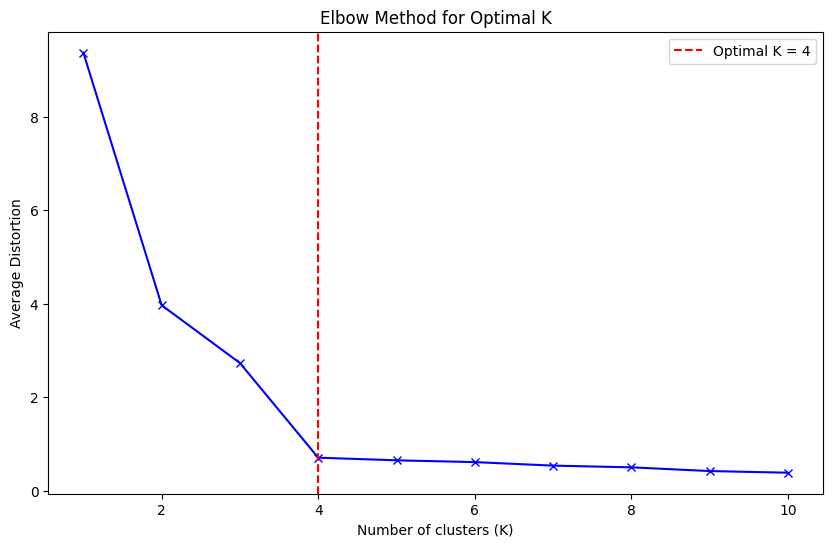

The optimal number of clusters (K) is: 4
Optimal K: 4


In [ ]:
def plot_elbow(X, max_K):
    #Plot the elbow curve to find the optimal K

    #Input:
    #    X: ndarray of shape (m, n) - m data points with n features
    #    max_K: int - maximum number of clusters to try

    #Output:
    #    Elbow plot
    #    optimal_k: int - optimal number of clusters

    distortions = []
    K_range = range(1, max_K + 1)

    for K in K_range:
        centroids = X[np.random.choice(X.shape[0], K, replace=False)]

        for _ in range(10):  # Run K-means for 10 iterations
            idx = find_closest_centroids(X, centroids)
            centroids = compute_centroids(X, idx, K)

### START CODE HERE ###

        distortion = np.sum((X - centroids[idx]) ** 2) / X.shape[0] # Your Code here to calculate the distortion for certian K

### END CODE HERE ###

        distortions.append(distortion)

    # Plot the distortion values against K
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Average Distortion')
    plt.title('Elbow Method for Optimal K')

    # Use KneeLocator to find the elbow point
    kneedle = KneeLocator(K_range, distortions, curve='convex', direction='decreasing')
    optimal_k = kneedle.elbow

    # Highlight the optimal K on the plot
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
    plt.legend()
    plt.show()

    print(f"The optimal number of clusters (K) is: {optimal_k}")
    return optimal_k

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# Find optimal K using the elbow method
optimal_k = plot_elbow(X, max_K=10)
print(f"Optimal K: {optimal_k}")

**TEST FUNCTION**

Running tests for plot_elbow:


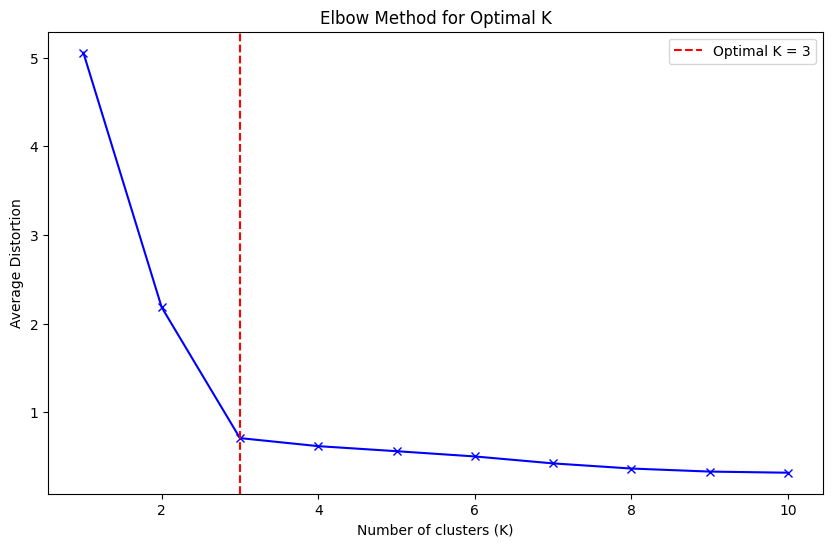

The optimal number of clusters (K) is: 3

Test case 1 (3 clusters):
Input X shape: (300, 2)
Input max_K: 10
Optimal K: 3


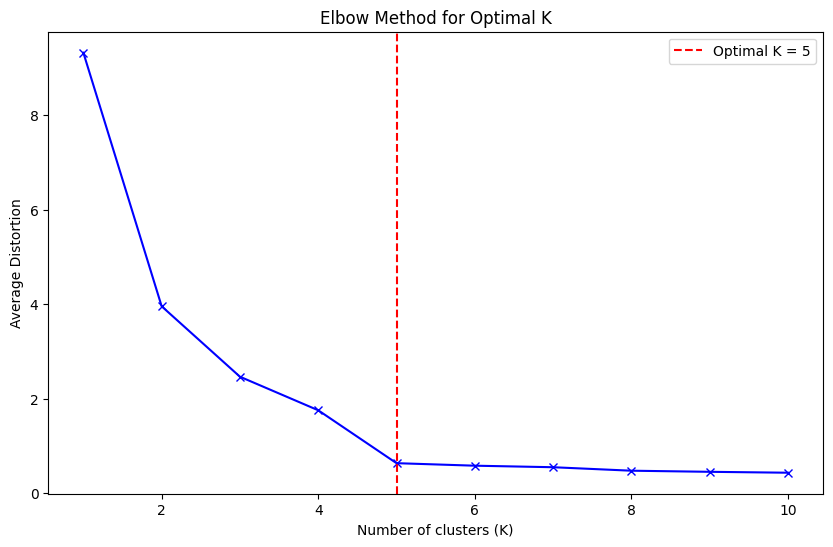

The optimal number of clusters (K) is: 5

Test case 2 (4 clusters):
Input X shape: (400, 2)
Input max_K: 10
Optimal K: 5

All tests passed!


In [ ]:
# Simply Run this cell.Do not Touch this code
# Test function
from sklearn.datasets import make_blobs

def plot_elbow_test(target):
    print("Running tests for plot_elbow:")

    np.random.seed(42)  # For reproducibility

    # Test case 1: 3 clusters
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
    max_K = 10

    optimal_k = target(X, max_K)

    print("\nTest case 1 (3 clusters):")
    print("Input X shape:", X.shape)
    print("Input max_K:", max_K)
    print("Optimal K:", optimal_k)

    assert 2 <= optimal_k <= 4, f"Test case 1 failed. Expected optimal K between 2 and 4, got: {optimal_k}"

    # Test case 2: 4 clusters
    X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
    max_K = 10

    optimal_k = target(X, max_K)

    print("\nTest case 2 (4 clusters):")
    print("Input X shape:", X.shape)
    print("Input max_K:", max_K)
    print("Optimal K:", optimal_k)

    assert 3 <= optimal_k <= 5, f"Test case 2 failed. Expected optimal K between 3 and 5, got: {optimal_k}"


    print("\n\033[92mAll tests passed!")

# You can run the test like this:
plot_elbow_test(plot_elbow)

## 2 - K-means on a Sample Dataset

After completing the two functions (`find_closest_centroids` and `compute_centroids`), and plotting the elbow curve for finiding optimal clusters using 'plot_elbow'

the next step is to run the K-means algorithm on a sample dataset and visualize the results. We'll use sklearn to generate our data and implement a method to find the optimal number of clusters.

### Dataset Generation with sklearn

We use sklearn's `make_blobs` function to create a synthetic dataset for our clustering task. This function generates isotropic Gaussian blobs for clustering, allowing us to create a controlled dataset with a known number of clusters.


### Understanding the `run_kmeans` Function

We encourage you to examine the `run_kmeans` function below to understand its workings:

**Note**: You do not need to implement anything for this part. Simply run the code provided below.



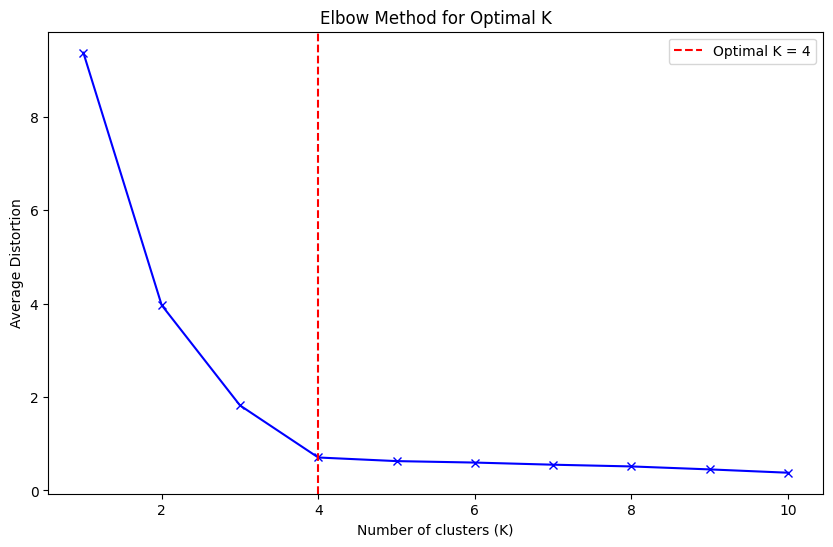

The optimal number of clusters (K) is: 4
Optimal K: 4


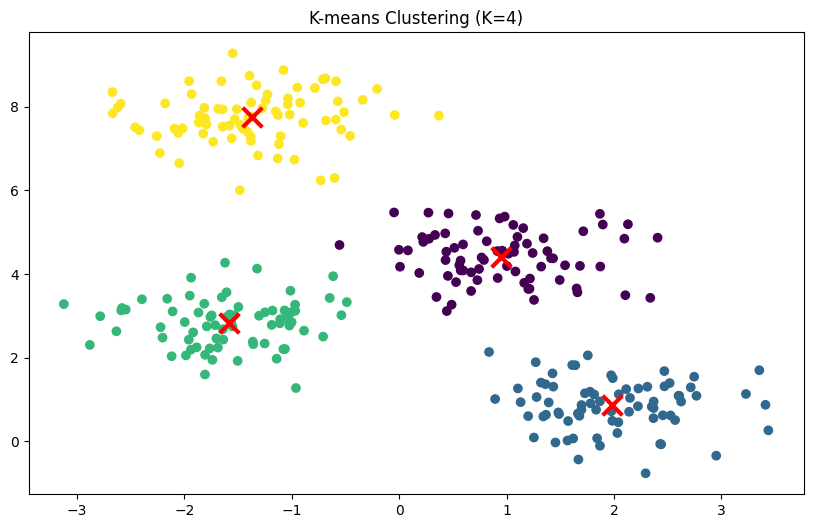

K-means clustering completed.


In [ ]:
# You do not need to implement anything for this part
from sklearn.datasets import make_blobs

def run_kmeans(X, K, max_iter=100):
    """
    Run the full K-means algorithm

    Input:
    X: ndarray of shape (m, n) - m data points with n features
    K: int - number of clusters
    max_iter: int - maximum number of iterations

    Output:
    centroids: ndarray of shape (K, n) - final centroids
    idx: ndarray of shape (m,) - final assignments
    """
    m, n = X.shape
    centroids = X[np.random.choice(m, K, replace=False)]

    for _ in range(max_iter):
        idx = find_closest_centroids(X, centroids)
        new_centroids = compute_centroids(X, idx, K)

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
    plt.title(f'K-means Clustering (K={K})')
    plt.show()

    return centroids, idx

# Main execution
if __name__ == "__main__":
    # Generate sample data
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    # Find optimal K using the elbow method
    optimal_k = plot_elbow(X, max_K=10)
    print(f"Optimal K: {optimal_k}")

    # Run K-means with the optimal K
    centroids, idx = run_kmeans(X, optimal_k)

    print("K-means clustering completed.")